In [32]:
from typing import Union
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

Vamos a usar otra forma de hacer gráficos, que se basa en el libro "The grammar of graphics"

<img src="plots/grammar.jpeg" width=400 height=400 />

In [46]:
import numpy as np
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_bw());
from matplotlib import pyplot as plt

El muestreo por importancia se basa en el hecho de que a veces uno no necesita un sorteo de números aleatorios per se, sino usarlos para estimar un valor de expectación:

$$
\begin{align}
\mathbb{E}_p[f] &= \int f(x) p(x) \mathrm{d} x \\
&= \int f(x) \frac{p(x)}{q(x)} q(x) \mathrm{d} x \\
&= \mathbb{E}_q\left[ f(x) \frac{p(x)}{q(x)} \right].
\end{align}
$$

Con esto, podemos generar estimaciones Monte Carlo de una distribución $f$ usando otra distribución $q$.

In [57]:
p = stats.distributions.beta(a=2, b=4)
q = stats.distributions.expon()

p es la distribución objetivo, y q es la distrib. con la que sabemos generar randoms

&nbsp;

In [58]:
xs = np.linspace(0, 5, num=1000)
ps = p.pdf(xs)
qs = q.pdf(xs)

In [59]:
df = pd.DataFrame({
    'x': xs,
    'p': ps,
    'q': qs,
})

In [60]:
df

,x,p,q
0,0.000000,0.000000,1.000000
1,0.005005,0.098605,0.995007
2,0.010010,0.194248,0.990040
3,0.015015,0.286975,0.985097
4,0.020020,0.376831,0.980179
...,...,...,...
995,4.979980,0.000000,0.006874
996,4.984985,0.000000,0.006840
997,4.989990,0.000000,0.006806
998,4.994995,0.000000,0.006772


<AxesSubplot:>

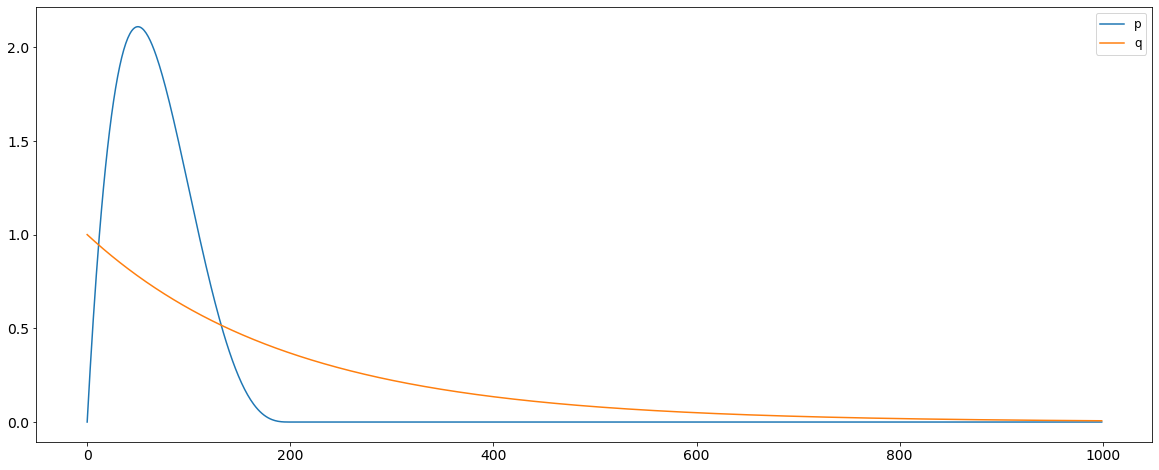

In [61]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot()
df.iloc[:,1:].plot(ax=ax)

In [62]:
df = pd.melt(df, id_vars=['x'], 
             var_name='distribution',
             value_name='density')

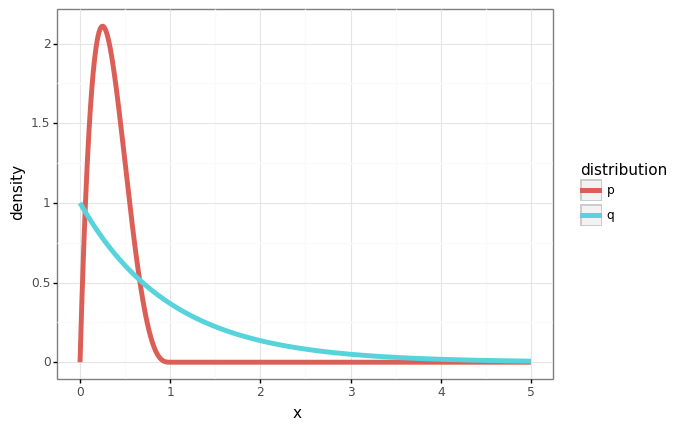

<ggplot: (8786090912362)>

In [63]:
gg.ggplot(df) + \
gg.aes(x='x', y='density', color='distribution') + \
gg.geom_line(size=2)

In [67]:
num_samples = 10000
samples = q.rvs(size=num_samples)
mean = np.mean(samples * p.pdf(samples) / q.pdf(samples))

Notar que aqui no estamos generando randoms sino directamente calculando la estimación

In [66]:
print('Estimacion de la media:')
print(f'Estimación pesada por importancia: {mean:.4f}')
print(f'Media verdadera:                   {p.mean():.4f}')

Estimacion de la media:
Estimación pesada por importancia: 0.3304
Media verdadera:                   0.3333


&emsp;

_________
EJEMPLO

In [22]:
# Obtener un histograma de la media de una distribución para varios sorteos

num_samples = 100
num_trials = 1000

p = stats.distributions.expon()

In [23]:
results = []
for _ in range(num_trials):
  result = p.rvs(size=num_samples).mean()
  results.append(result)

In [24]:
df = pd.DataFrame({
    r'$\mu$': np.array(results)
})

In [17]:
# El TLC dice como debería ser la distribución de la media (en el límite)
mu = p.mean()
sd = np.sqrt(p.var() / num_samples)

normal = stats.distributions.norm(loc=mu, scale=sd)
xs = np.linspace(0.6, 1.4, num=1000)

p_df = pd.DataFrame({'x': xs,
                     'p': normal.pdf(xs)})

In [18]:
plot = (gg.ggplot(df) +
        gg.geom_line(data=p_df, mapping=gg.aes(x='x', y='p'), 
                       size=2, linetype='dashed') +
        gg.geom_histogram(mapping=gg.aes(x='$\mu$', y='stat(density)'), 
                            bins=20, colour='black', fill='beige', alpha=0.6)
       )

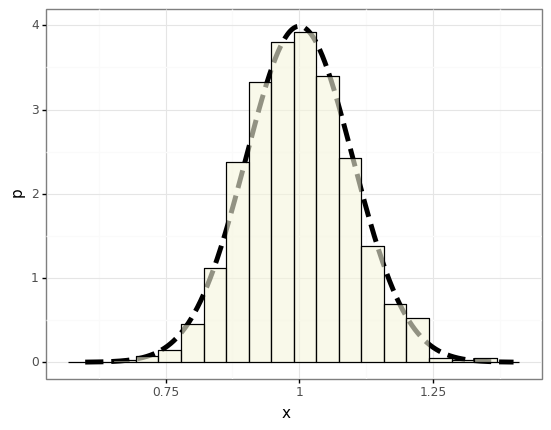

<ggplot: (8786091225248)>

In [19]:
plot